In [18]:
import numpy as np

mu = 2.0
sigma = 3.0
delta = sigma / 100.0
xx = np.arange(mu - 10*sigma, mu + 10*sigma, delta)
integrand = np.exp(-0.5 * (xx - mu)**2 / sigma**2)
Zapprox = np.sum(integrand * delta)
print("Zapprox = %g" % Zapprox)

Zapprox = 7.51988


In [2]:
sigma*np.sqrt(2*np.pi)

7.519884823893001

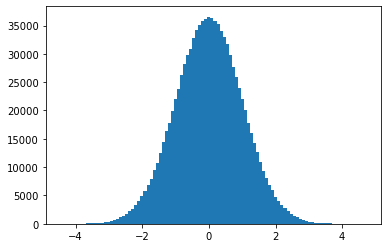

In [3]:
import numpy as np
from matplotlib import pyplot as plt

N = int(1e6) # 1e6 is a float, numpy wants int arguments
xx = np.random.randn(N)
hist_stuff = plt.hist(xx, bins=100)
plt.show()

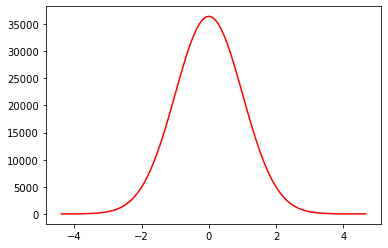

In [11]:
bin_centres = 0.5*(hist_stuff[1][1:] + hist_stuff[1][:-1])
# Fill in an expression to evaluate the PDF at the bin_centres.
# To square every element of an array, use **2
pdf = (1/np.sqrt(2*np.pi))*np.e**(-0.5*bin_centres**2)
bin_width = bin_centres[1] - bin_centres[0]
predicted_bin_heights = pdf * bin_width * 1e6 # pdf needs scaling correctly
# Finally, plot the theoretical prediction over the histogram:
plt.plot(bin_centres, predicted_bin_heights, '-r')
plt.show()

In [4]:
np.e

2.718281828459045

In [11]:
import scipy as scp
from scipy import stats



stats.poisson.cdf(0.01, 0.6)


0.5488116360940265

In [16]:
stats.norm.cdf(x= 0.8, 0.2)

stats.


0.8187307530779818

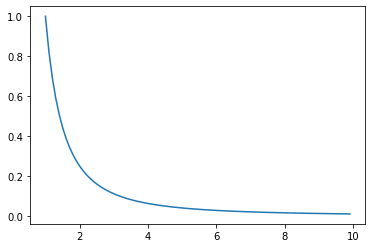

In [44]:
import numpy as np
from matplotlib import pyplot as plt
b = 1
xx = np.arange(1,10, 0.1)
yy = stats.pareto.pdf(xx, b)
dist = plt.plot(xx,yy)
plt.show()


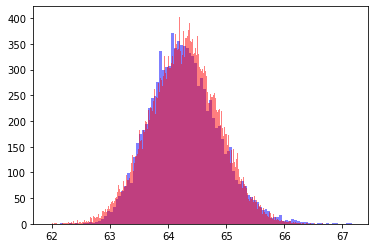

In [76]:
K = 10000
N = 60
b = 15
samples = stats.pareto.rvs(b, size=(K,N)).sum(1)
hist_pareto = plt.hist(samples, bins=100, color='b', alpha=0.5)
mu = np.mean(samples)
sigma = np.std(samples)
norm_samples = stats.norm.rvs(loc = mu, scale = sigma, size=100000)
hist_norm = plt.hist(norm_samples, bins =1000, color='r', alpha=0.5)
plt.show()

In [79]:
xx = 1 * (np.random.rand(100) < 0.3)

In [88]:
print(np.mean(xx), np.std(xx))
stde = np.std(xx)/10
stde

0.3 0.45825756949558394


0.04582575694955839

In [83]:
#np.random.rand(100)

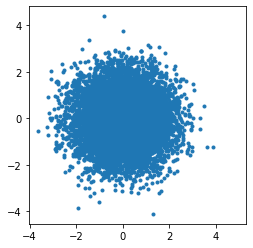

In [124]:
N = int(1e4); D = 2
X = np.random.randn(N, D)
plt.plot(X[:,0], X[:,1], '.')
plt.axis('square')
plt.show()



In [93]:
D = 3; Sigma = np.cov(np.random.randn(D, 4*D))
A = np.linalg.cholesky(Sigma)
Sigma_from_A = A @ A.T  # up to round-off error, matches Sigma

In [107]:
x1 = np.random.normal(loc=0, scale=1, size=(100))
x2 = np.random.normal(loc=0, scale=1, size=(100))
Lambda = np.array([[1,0],[0,1]])
np.cov(np.array([x1,x1]))

array([[1.01917709, 1.01917709],
       [1.01917709, 1.01917709]])

In [120]:
np.cov(np.array([x1,x2]))

array([[1.01917709, 0.05580858],
       [0.05580858, 1.24248927]])

In [109]:
np.array([x1,x1])

array([[-0.0550764 , -1.01010604,  1.25959209,  1.34358211,  0.59237371,
         0.76607284,  1.00795589, -1.0698575 , -1.00616645, -0.59039974,
        -0.66409553, -1.36072492, -0.25662461,  0.13334831, -0.52370658,
        -0.40840997,  1.02610097,  2.08619388,  0.2206545 ,  1.38342184,
        -0.63103565, -2.29564676,  0.28128127, -1.91649431, -0.94520072,
         0.06644196, -0.55262444,  0.91306928, -0.11356385, -0.16343074,
        -0.03535475,  1.51201831, -0.19916657,  1.89478769,  0.05364401,
         1.1808517 , -1.0395772 , -0.93602245,  0.79625663, -0.07313814,
        -1.49828429,  1.22859776,  1.29865972,  0.26754549, -1.1593181 ,
        -0.46815286, -0.58914076,  0.26254794, -0.48173679, -1.38893338,
        -0.74704137, -0.08807533, -0.9765091 , -0.57499348, -0.29099898,
        -0.12643303, -1.37969875, -1.0690786 ,  0.10731416, -0.75463234,
        -0.46167337,  0.31284306, -0.13033783, -2.55221206,  0.63753899,
        -0.14612608,  1.00535944,  1.53327055, -0.2

In [119]:
np.cov(np.array([[0, 1, 2],[2,1,0]]))

array([[ 1., -1.],
       [-1.,  1.]])

array([[1, 1],
       [1, 1]])

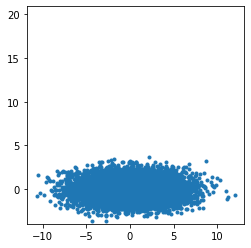

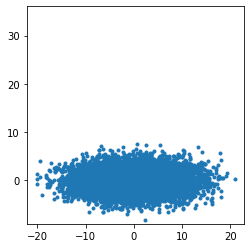

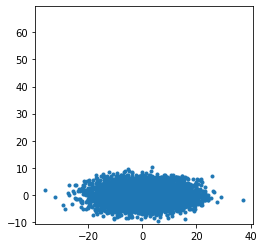

In [176]:
a = 1
#A = np.array([[1,0],[a,1-a]])
for a in [1,4,7]:
    #for b in [1,4,6]:
    Sigma = np.array([[a,0],[0,a]])
    A = np.linalg.cholesky(Sigma)
    x1 = np.random.normal(loc=0, scale=3, size=(10000))
    x2 = np.random.normal(loc=0, scale=1, size=(10000))
    y1 = A @ np.array([x1,x2])
    plt.plot(y1[0,:], y1[1,:], '.')
    plt.axis('square')
    plt.show()

       # A @ A.T

(100, 1)

In [135]:
np.array([x1,x2]).shape

(2, 100)

In [136]:
A.shape


(2, 2)

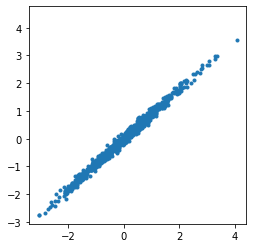

In [150]:


N = 1000; D = 2
X = np.random.randn(N, D)
def plot_points(aa):
    A = np.array([[1, 0], [aa, 1-aa]])
    Z = np.dot(X, A.T)
    plt.clf()
    plt.plot(Z[:,0], Z[:,1], '.')
    plt.axis('square')
    plt.show()
plot_points(0.9)

In [153]:
a = 3
D = 3; Sigma = np.array([[a,0],[0,a]])
A = np.linalg.cholesky(Sigma)
A

array([[1.73205081, 0.        ],
       [0.        , 1.73205081]])